In [34]:
import numpy as np
import pandas as pd
import csv
import re

In [9]:
rawdata = pd.read_csv('raw_data/training_set_no_time.csv', encoding = "ISO-8859-1")

In [53]:
rawdata.head()

,Engagements,Followers at Posting,Type,Description,len_text,word_ct,excl_ct,ques_ct,period_ct,comma_ct,caps_ct,tags_ct,player
0,502093,36984682,Video,The @raptors bench trio of @sergeibaka @norman...,95,14,1,0,0,0,2,4,<filter object at 0x000001D3BD1100F0>
1,603380,36984682,Video,@kyle_lowry7 pulls from deep for the @raptors ...,64,11,1,0,0,0,3,2,<filter object at 0x000001D3BD110048>
2,603380,36984682,Video,@k_mid22 with some english on the @bucks dime!,46,7,1,0,0,0,0,2,<filter object at 0x000001D3BD110668>
3,725100,36984682,Video,Kawhi punches it home with the left on TNT!,43,8,1,0,0,0,4,0,<filter object at 0x000001D3BD1108D0>
4,661446,36984682,Video,@giannis_an34 goes baseline early to rock the ...,57,9,1,0,0,0,3,1,<filter object at 0x000001D3BD110B00>


In [26]:
rawdata['len_text'] = list(map(lambda x: len(str(x)), rawdata['Description']))

In [28]:
rawdata['word_ct'] = list(map(lambda x: str(x).count(' '), rawdata['Description']))

In [29]:
rawdata['excl_ct'] = list(map(lambda x: str(x).count('!'), rawdata['Description']))

In [30]:
rawdata['ques_ct'] = list(map(lambda x: str(x).count('??'), rawdata['Description']))

In [31]:
rawdata['period_ct'] = list(map(lambda x: str(x).count('.'), rawdata['Description']))

In [32]:
rawdata['comma_ct'] = list(map(lambda x: str(x).count(','), rawdata['Description']))

In [38]:
rawdata['caps_ct'] = list(map(lambda x: len(re.findall(r'[A-Z]', str(x))), rawdata['Description']))

In [40]:
rawdata['tags_ct'] = list(map(lambda x: str(x).count('@'), rawdata['Description']))

In [51]:
def hasTag(y):
    if y[0] == '@':
        return True
    else:
        return False

In [71]:
rawdata['player'] = list(map(lambda x: list(filter(lambda y: hasTag(y), str(x).split())), rawdata['Description']))

AttributeError: 'list' object has no attribute 'strip'

In [77]:
rawdata['player'] = list(map(lambda x: list(map(lambda y: y.strip(',.-_!?/><()&'), x)), rawdata['player']))

In [75]:
rawdata['player']

0       [@raptors, @sergeibaka, @normanpowell4, @fredv...
1                                [@kyle_lowry7, @raptors]
2                                      [@k_mid22, @bucks]
3                                                      []
4                                         [@giannis_an34]
5                               [@lukadoncic, @traeyoung]
6                                             [@warriors]
7                                      [@bucks, @raptors]
8                                  [@warriors, @nbastore]
9                          [@stephencurry30, @nbahistory]
10                       [@stephencurry30, @money23green]
11                             [@warriors, @trailblazers]
12                             [@money23green, @warriors]
13                                            [@warriors]
14                             [@money23green, @warriors]
15          [@stephencurry30, @money23green, @nbahistory]
16                                     [@meyersleonard11]
17            

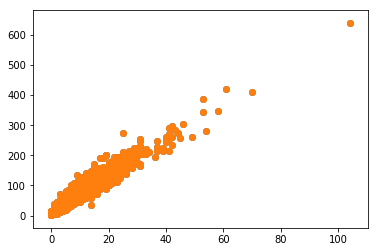

In [48]:
import matplotlib.pyplot as plt
plt.scatter(rawdata['word_ct'], rawdata['len_text'])
plt.show()

In [24]:
rawdata['Description']

0       The @raptors bench trio of @sergeibaka @norman...
1       @kyle_lowry7 pulls from deep for the @raptors ...
2          @k_mid22 with some english on the @bucks dime!
3             Kawhi punches it home with the left on TNT!
4       @giannis_an34 goes baseline early to rock the ...
5       Congrats to the 2018-19 NBA All-Rookie First T...
6       The @warriors locked in for four games to adva...
7       Will the @bucks take a commanding 3-1 lead... ...
8       TAP to SHOP the @warriors Western Conference C...
9       Hey @stephencurry30... that was the first time...
10      @stephencurry30 (37/13/11) & @money23green (18...
11      The @warriors defeat @trailblazers 119-117 to ...
12      @money23green (18/14/11) reacts to a 5th strai...
13      The @warriors win the West & advance to their ...
14      @money23green triple extends the @warriors lea...
15      @stephencurry30 & @money23green become the fir...
16                     ?? @meyersleonard11! ?? (??: ESPN)
17      @money